# Parkinson's Disease Classification using Machine learning model (Random Forests)

<b>Importing required modules and methods from respeective libraries.</b>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

<b>Reading the dataset.</b>

In [36]:
df = pd.read_csv('pd_speech_features.csv')

Based on speech signals, numerous studies on the classification of PD have been researched, applying different feature engineering and classifying methods to analyze voice records. The techniques proposed have achieved satisfactory results with high accuracies for the same dataset used in this research.

In [37]:
df.sample(10) #10 random patient values.

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
138,46,1,0.45210,0.75399,0.77848,179,173,0.008389,0.001081,0.00862,...,2.1298,2.7130,2.5036,3.3097,2.6562,8.2142,16.4783,18.5868,64.3239,1
370,123,0,0.83918,0.80293,0.29879,365,364,0.005275,0.001674,0.00174,...,7.0768,3.9566,3.7104,5.2764,4.3985,2.8546,2.7479,3.3696,3.1582,0
755,251,0,0.81304,0.76471,0.46374,340,339,0.005676,0.000037,0.00078,...,62.9927,21.8152,9.2457,4.8555,3.0551,3.0415,4.0116,2.6217,3.1527,0
81,27,0,0.34488,0.62269,0.48573,443,441,0.004353,0.000628,0.00233,...,52.3417,29.9333,7.1216,3.5414,3.1618,2.9177,19.8108,35.6502,62.9818,0
131,43,1,0.77075,0.75399,0.36358,308,307,0.006261,0.000081,0.00167,...,33.2163,25.2039,26.9904,13.1830,12.3441,13.5425,22.8722,23.6290,78.2999,1
435,145,1,0.82759,0.63558,0.37521,344,343,0.005612,0.000053,0.00121,...,160.6611,130.0455,100.7989,56.3096,32.9181,39.1589,46.2313,38.2874,42.7546,1
470,156,1,0.78174,0.65600,0.59176,598,579,0.002789,0.001904,0.00774,...,2.8692,3.5046,3.5810,3.0624,2.9596,2.8284,4.3397,4.7578,4.3066,0
360,120,0,0.09078,0.66483,0.45195,400,399,0.004818,0.001497,0.00189,...,4.4912,7.1072,37.9767,36.9764,52.7017,49.2991,43.5904,43.5273,95.3252,1
449,149,0,0.77201,0.57227,0.21349,554,553,0.003487,0.000015,0.00027,...,28.5792,10.9022,5.2229,4.7446,5.9120,4.3724,3.8626,4.3552,4.3942,0
423,141,1,0.70897,0.75667,0.81928,191,183,0.007597,0.000553,0.02010,...,2.3724,2.2054,2.0080,2.7799,2.5287,2.8741,3.1855,2.8069,2.7752,1


In [38]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [40]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [41]:
df.isnull().sum().sum() #this means there are no missing values or nan values.

0

In [42]:
feature_names = df.columns
feature_names = np.array(feature_names)
feature_names1 = np.delete(feature_names ,[0,754])

In [43]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

564 people from our data are affected with parkinson's disease and remaining 192 people are negative.

In [44]:
df.groupby('class').mean()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
class,,,,,,,,,,,,,,,,,,,,,
0,139.421875,0.359375,0.767434,0.663866,0.430807,372.244792,371.031250,0.005699,0.000290,0.001405,...,47.053772,45.754404,32.006881,21.592319,14.797452,10.726868,9.021939,9.619535,9.326543,15.074830
1,120.760638,0.569149,0.739084,0.712856,0.508888,307.539007,306.218085,0.006585,0.000414,0.002637,...,12.165554,19.593113,19.719812,17.565102,13.556976,12.726897,13.516916,16.562531,16.598373,37.066227


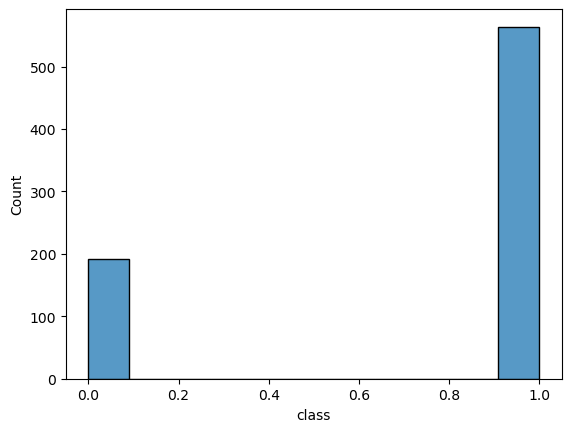

In [45]:
sns.histplot(x='class', data=df, )
plt.show()

In [46]:
df['gender'].value_counts()

1    390
0    366
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='Count'>

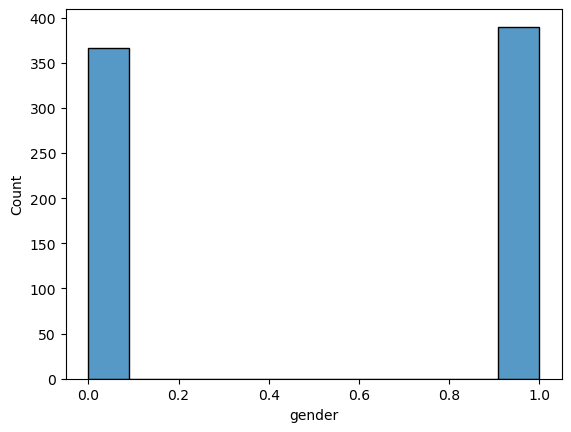

In [47]:
sns.histplot(df['gender'])

we are dividing the dataset into two sets <br>
1) dependent variables(x)
<br>2)target variable(y)

In [48]:
x = df.drop(['id','class'],axis=1) #all the inputs except id cause
y = df['class']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


splitting the dependent and target variables into training and testing data

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(567, 753)
(189, 753)
(567,)
(189,)


In [50]:
x_train.sample(10)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
376,0,0.84260,0.75185,0.31383,414,413,0.004660,0.000037,0.00065,0.000003,...,124.0581,97.7638,60.7828,34.0243,13.5261,5.7852,6.2358,5.5010,4.1432,2.7032
112,0,0.75781,0.57600,0.65037,310,309,0.006220,0.000167,0.00196,0.000012,...,1.9354,15.4756,9.9453,7.0538,5.7651,3.8592,4.0615,14.3037,20.1550,66.3533
225,0,0.80262,0.80754,0.39255,329,328,0.005865,0.000030,0.00073,0.000004,...,1.6955,3.6220,3.4087,3.7320,4.5514,2.7882,2.6902,2.3387,2.3601,3.4241
282,0,0.77044,0.77079,0.44670,252,251,0.007639,0.000126,0.00242,0.000018,...,2.2752,2.5834,3.6465,43.9271,43.0296,55.4785,53.7924,50.4121,44.6636,90.6592
158,1,0.82808,0.61203,0.60959,322,321,0.006000,0.000070,0.00148,0.000009,...,2.1339,9.2944,8.3217,7.4647,4.8507,6.7956,9.5988,10.8112,16.2363,47.9681
70,1,0.80415,0.76904,0.45118,232,231,0.008330,0.000104,0.00218,0.000018,...,1.6315,1.6474,3.2509,4.7866,2.6229,2.7846,2.8419,4.6059,2.9694,3.1318
270,0,0.50598,0.64620,0.69831,168,167,0.011474,0.000296,0.00729,0.000084,...,2.1926,6.1377,6.1270,4.7823,4.8881,2.5868,2.9627,3.8031,3.7451,2.9601
554,0,0.83347,0.80818,0.45743,405,404,0.004763,0.000138,0.00169,0.000008,...,28.1283,17.1945,9.4750,5.6390,3.8970,4.0204,7.8607,31.6947,33.9068,71.3661
646,1,0.31220,0.77075,0.77434,190,186,0.009823,0.000453,0.00770,0.000076,...,4.0518,3.7485,3.9942,2.7194,2.5021,2.9832,4.3258,3.3141,3.0237,3.2375
38,1,0.82606,0.68639,0.47103,267,266,0.007219,0.000094,0.00180,0.000013,...,1.7651,2.1540,11.0081,2.7474,3.1280,2.9275,3.2248,3.1456,3.7449,2.9688


The SelectKBest method is a feature selection technique used in machine learning to select the most important features from a dataset. It works by selecting the k most relevant features based on a scoring function that measures the strength of the relationship between each feature and the target variable.<br><br><br>The SelectKBest method is commonly used in preprocessing because it helps reduce the dimensionality of the dataset, which can improve the accuracy and speed of the model. The method works by ranking the features based on their scores and selecting the top k features with the highest scores. The scoring function used can vary, but some commonly used methods include chi-squared, mutual information, and f-regression.<br><br><br>Mutual Information: The mutual information scoring function measures the amount of information that one variable (i.e., the feature) contains about another variable (i.e., the target variable). The higher the mutual information score, the more information the feature contains about the target variable.<br><br>Once the scoring function is applied to each feature, the SelectKBest method ranks the features based on their scores and selects the top k features with the highest scores. <br><br> mutual information can be used to measure the amount of information that a feature provides about the target variable. Features with higher mutual information scores are considered more informative and may be selected for inclusion in a machine learning model.<br><br>I(X ; Y) = H(X) – H(X | Y)
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

Mutual information is a measure of dependence or “mutual dependence” between two random variables. As such, the measure is symmetrical, meaning that I(X ; Y) = I(Y ; X).

In [51]:
mutual_info = mutual_info_classif(x_train,y_train)

In [52]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = feature_names1
mutual = mutual_info[:20]
mutual

gender                     0.032277
PPE                        0.029803
DFA                        0.038760
RPDE                       0.010417
numPulses                  0.061040
numPeriodsPulses           0.069391
meanPeriodPulses           0.059245
stdDevPeriodPulses         0.052090
locPctJitter               0.070391
locAbsJitter               0.073574
rapJitter                  0.045725
ppq5Jitter                 0.043782
ddpJitter                  0.058088
locShimmer                 0.042872
locDbShimmer               0.055250
apq3Shimmer                0.000000
apq5Shimmer                0.020099
apq11Shimmer               0.012657
ddaShimmer                 0.000000
meanAutoCorrHarmonicity    0.036816
dtype: float64

In [53]:
feature_names2 = feature_names1[:20]
feature_names2

array(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
       'locShimmer', 'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer',
       'apq11Shimmer', 'ddaShimmer', 'meanAutoCorrHarmonicity'],
      dtype=object)

In [54]:
selector = SelectKBest(mutual_info_classif, k=100)
x_train = selector.fit_transform(x_train, y_train)
x_test = selector.transform(x_test)

In [55]:
selected_indices = selector.get_support(indices=True)
selected_features = feature_names[selected_indices]
selected_features

array(['RPDE', 'stdDevPeriodPulses', 'locPctJitter',
       'meanHarmToNoiseHarmonicity', 'minIntensity', 'maxIntensity',
       'mean_MFCC_1st_coef', 'mean_delta_log_energy',
       'mean_12th_delta_delta', 'std_MFCC_12th_coef', 'std_5th_delta',
       'std_12th_delta', 'std_2nd_delta_delta', 'std_3rd_delta_delta',
       'std_5th_delta_delta', 'std_6th_delta_delta',
       'std_7th_delta_delta', 'std_8th_delta_delta',
       'app_entropy_shannon_3_coef', 'app_entropy_shannon_4_coef',
       'app_TKEO_std_4_coef', 'app_LT_entropy_shannon_4_coef',
       'app_LT_entropy_shannon_5_coef', 'app_LT_entropy_shannon_6_coef',
       'app_LT_entropy_shannon_7_coef', 'app_LT_entropy_shannon_8_coef',
       'app_LT_entropy_log_4_coef', 'app_LT_entropy_log_5_coef',
       'app_LT_entropy_log_6_coef', 'app_LT_TKEO_std_4_coef',
       'tqwt_energy_dec_12', 'tqwt_energy_dec_24', 'tqwt_energy_dec_25',
       'tqwt_energy_dec_26', 'tqwt_entropy_shannon_dec_6',
       'tqwt_entropy_shannon_dec_7', 'tqw

In [56]:
len(selected_features)

100

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(type(x_train))
print(type(x_test))
print(type(y_train))

(567, 100)
(189, 100)
(567,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [58]:
x_train = pd.DataFrame(x_train,columns = selected_features)
x_train.head()

,RPDE,stdDevPeriodPulses,locPctJitter,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,mean_MFCC_1st_coef,mean_delta_log_energy,mean_12th_delta_delta,std_MFCC_12th_coef,...,tqwt_skewnessValue_dec_15,tqwt_skewnessValue_dec_16,tqwt_skewnessValue_dec_17,tqwt_skewnessValue_dec_21,tqwt_skewnessValue_dec_22,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_skewnessValue_dec_29,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_35
0,365.0,0.00144,0.000008,63.808043,67.456526,65.859638,3.11680,-0.009343,0.166510,0.026949,...,0.001359,-0.004687,-0.006423,0.019269,0.003028,0.000246,0.004491,-0.183690,8.8585,50.7702
1,285.0,0.00129,0.000009,76.717847,78.856254,77.923276,0.13828,-0.001110,0.117810,0.017160,...,0.005398,0.000187,0.001211,0.020818,0.010503,-0.000428,-0.000599,0.288930,12.9407,4.2463
2,429.0,0.00093,0.000004,78.326098,81.102545,79.845701,-1.66580,-0.006300,0.151220,0.020791,...,0.000214,0.000117,-0.000190,-0.001479,-0.000009,0.008822,-1.205800,-0.420460,9.2536,4.1060
3,380.0,0.00302,0.000015,79.032401,80.651938,79.726410,2.85710,-0.000383,0.083386,0.011717,...,0.029701,-0.002846,0.001127,-0.001181,-0.014229,-0.000143,0.006731,-0.003573,6.8101,2.7635
4,400.0,0.00225,0.000011,78.304901,80.479500,79.354193,1.64750,-0.022099,0.131400,0.021407,...,-0.003120,-0.008393,0.000270,0.005267,0.000007,0.008268,0.022123,-0.292960,12.9599,14.0905


In [59]:
x_test = pd.DataFrame(x_test,columns = selected_features)
x_test.head()

,RPDE,stdDevPeriodPulses,locPctJitter,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,mean_MFCC_1st_coef,mean_delta_log_energy,mean_12th_delta_delta,std_MFCC_12th_coef,...,tqwt_skewnessValue_dec_15,tqwt_skewnessValue_dec_16,tqwt_skewnessValue_dec_17,tqwt_skewnessValue_dec_21,tqwt_skewnessValue_dec_22,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_skewnessValue_dec_29,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_35
0,356.0,0.00129,0.000007,76.046117,80.403721,78.417348,-0.66072,-0.003239,0.222050,0.035809,...,9.660000e-05,1.583000e-03,-3.266300e-04,4.516000e-03,4.977500e-03,-2.132500e-04,1.516900e-02,1.487400e-01,10.9205,18.9718
1,381.0,0.00112,0.000006,75.572054,78.438432,77.253862,-2.03130,-0.000792,0.155510,0.025773,...,3.790000e-05,4.849000e-03,1.065000e-04,-4.742100e-03,-1.719500e-03,-7.720000e-05,1.907600e-03,-1.896400e-02,6.0842,2.9275
2,276.0,0.00379,0.000027,77.560289,80.246423,78.901853,1.21490,-0.005180,0.157390,0.029414,...,1.090000e-17,-2.300000e-17,5.930000e-18,4.030000e-18,1.730000e-17,-2.000000e-18,-6.100000e-18,1.510000e-15,702.3142,2.6109
3,333.0,0.00110,0.000006,77.217507,79.149413,78.261211,-0.17811,-0.001657,0.088818,0.015188,...,5.246500e-04,-6.877700e-04,-1.270000e-05,6.125200e-04,1.461600e-02,-2.777300e-04,-1.713100e-03,-4.533900e-02,8.2246,4.4909
4,351.0,0.00258,0.000014,74.680778,78.791567,77.351024,2.72270,0.004068,0.182250,0.032551,...,1.507100e-03,2.949300e-04,-1.205000e-04,3.315900e-03,4.401000e-04,-8.260000e-05,1.079800e-02,1.137900e-01,4.9112,3.9321


In [60]:
x_test.shape

(189, 100)

In [61]:
x_train.corr()

,RPDE,stdDevPeriodPulses,locPctJitter,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,mean_MFCC_1st_coef,mean_delta_log_energy,mean_12th_delta_delta,std_MFCC_12th_coef,...,tqwt_skewnessValue_dec_15,tqwt_skewnessValue_dec_16,tqwt_skewnessValue_dec_17,tqwt_skewnessValue_dec_21,tqwt_skewnessValue_dec_22,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_skewnessValue_dec_29,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_35
RPDE,1.000000,-0.434070,-0.519710,0.130876,0.109733,0.120616,-0.410236,0.108662,-0.056151,-0.079511,...,0.045954,0.026698,0.015303,-0.098695,0.217334,0.050020,0.106635,0.092779,-0.038286,-0.031183
stdDevPeriodPulses,-0.434070,1.000000,0.968938,-0.200348,-0.104239,-0.143679,0.250342,-0.048898,0.182068,0.256547,...,-0.028991,-0.032699,-0.050549,0.011961,-0.030882,-0.006721,-0.034157,-0.025318,-0.024411,0.012551
locPctJitter,-0.519710,0.968938,1.000000,-0.168833,-0.094139,-0.125884,0.257125,-0.049736,0.141090,0.206044,...,-0.024118,-0.023288,-0.036767,0.006031,-0.038635,-0.004848,-0.035423,-0.027774,-0.013634,0.005117
meanHarmToNoiseHarmonicity,0.130876,-0.200348,-0.168833,1.000000,0.868739,0.908406,-0.339775,0.174630,-0.661226,-0.678515,...,-0.009511,-0.019278,0.007942,-0.019600,0.051225,0.011488,0.032205,0.000426,-0.479744,-0.333425
minIntensity,0.109733,-0.104239,-0.094139,0.868739,1.000000,0.990693,-0.343912,0.200964,-0.224968,-0.277083,...,-0.020079,-0.019403,0.016038,-0.015161,0.050979,0.010343,0.038454,-0.002074,-0.551988,-0.301918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_skewnessValue_dec_24,0.050020,-0.006721,-0.004848,0.011488,0.010343,0.011034,-0.018071,0.014024,-0.000179,-0.011256,...,0.014007,0.003937,0.007829,-0.024852,0.060352,1.000000,0.089766,0.035782,-0.000026,0.010849
tqwt_skewnessValue_dec_25,0.106635,-0.034157,-0.035423,0.032205,0.038454,0.033429,-0.067743,0.012622,-0.002841,-0.016988,...,0.006606,0.005575,0.008929,-0.018342,0.034699,0.089766,1.000000,0.461115,-0.014134,-0.054217
tqwt_skewnessValue_dec_29,0.092779,-0.025318,-0.027774,0.000426,-0.002074,-0.003323,-0.028226,-0.008098,0.002632,0.001883,...,-0.018847,-0.016887,0.032848,0.013393,0.106191,0.035782,0.461115,1.000000,-0.004560,0.021512
tqwt_kurtosisValue_dec_4,-0.038286,-0.024411,-0.013634,-0.479744,-0.551988,-0.551667,0.182225,-0.108042,0.117863,0.147310,...,-0.005532,0.011361,-0.008536,-0.020567,-0.006829,-0.000026,-0.014134,-0.004560,1.000000,0.183131


In [62]:
#applying Random Forest model

In [63]:
m2 = RandomForestClassifier(n_estimators = 200,criterion='entropy',max_depth=20,min_samples_split=12)
m2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=12,
                       n_estimators=200)

In [64]:
print('Training Score',m2.score(x_train,y_train))
print('Testing Score',m2.score(x_test,y_test))

Training Score 0.9964726631393298
Testing Score 0.8624338624338624


here the difference between training accuracy and testing accuracy is more. this means our data is overfitted.

In [65]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 1 1]


In [66]:
ypred = np.array(ypred_m2)
ytest = np.array(y_test)

In [67]:
data = {'Original': ytest,
        'Predicted': ypred}

In [34]:
comp = pd.DataFrame(data)
comp.sample(10)

,Original,Predicted
93,0,0
21,0,0
61,1,1
158,1,1
25,1,1
76,1,1
89,0,1
47,1,1
1,0,0
175,1,1


In [68]:
cm_m2 = confusion_matrix(y_test,ypred_m2)
print(cm_m2)
print(classification_report(y_test,ypred_m2))

[[ 27  18]
 [  8 136]]
              precision    recall  f1-score   support

           0       0.77      0.60      0.68        45
           1       0.88      0.94      0.91       144

    accuracy                           0.86       189
   macro avg       0.83      0.77      0.79       189
weighted avg       0.86      0.86      0.86       189



In [69]:
# fn = feature names
fn = feature_names

# class_name or category names
cn = ['0','1']
print(cn)

['0', '1']


In [70]:
plt.figure(figsize=(100,100))
tree.plot_tree(m2.estimators_[0],feature_names=fn,class_names=cn,filled=True)
plt.show()

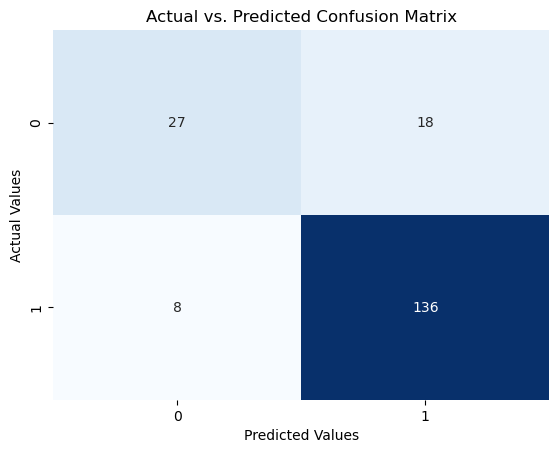

In [71]:
#conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(cm_m2, annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [72]:
def parkinson(input_data):
    # changing input data to a numpy array
    input_data_as_array = np.asarray(input_data)

    # reshape the numpy array
    input_data_reshaped = input_data_as_array.reshape(1,-1)

    predict = m2.predict(input_data_reshaped)
    print(predict)

    if (predict[0] == 0):
      print("The Person does not have Parkinsons Disease")

    else:
      print("The Person has Parkinsons")

In [73]:
input_data_1 = (0.00218,18.995,69.9974958,76.08804597,8.4781,-0.001013,0.17762,0.030284,0.023057,0.06641,0.021565,0.015351,0.014642,0.019681,0.012829,-54991273,-79779216.69,322.8542,67151.7571,-57264.6625,-98433.1856,-184901.7535,-381059.351,-776445.2329,-1676725.978,153.8978,132.2489,124.1971,101.0889,0.00023899,0.057908,0.01007,0.057575,0.59587,2.1832,4.8635,2.818,18.8625,89.7525,189.5,0.023151,0.015562,-281439.269,-229943.2967,-201985.0408,-52209.7866,-3726.2679,1.67E-07,6.78E-06,2.44E-05,3.58E-05,5.03E-05,2.33E-05,0.0069193,8.58E-07,2.53E-06,1.50E-05,5.87E-05,7.36E-05,5.90E-05,0.00018979,0.02762,-1.27E-07,-3.10E-05,1.03E-05,0,-0.00038921,6.15E-17,0,0.0004446,-0.00016867,0.00039625,0.0010075,0.0022682,0.0046972,0.0051989,0.0043241,0.013373,0.036869,0.063087,0.0027106,-0.026273,-0.02416,-0.026321,-0.024286,-0.29603,0.025222,0.022796,0.048924,0.20486,0.29603,0.0074332,1.51E-17,2.21E-17,-4.47E-17,-4.29E-19,-9.66E-18,0.030756,51.9577,3.0004)

parkinson(input_data_1)

[1]
The Person has Parkinsons


/Users/achuthkompella/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [74]:
input_data_2 = (0.00143,18.723,67.44275074,73.72491725,6.3131,0.0055168,0.2923,0.028751,0.030072,0.016072,0.021327,0.014622,0.013687,0.014232,0.015491,-165325200.3,-239355853.7,349.3665,185527.0574,-72390.4008,-124060.2075,-232480.5396,-478102.1104,-972410.3369,-2096387.081,159.1237,136.2766,127.6267,123.5262,0.0010987,0.018368,0.003217,0.017395,4.3392,11.4121,9.7016,17.0094,105.6802,313.6427,503.3029,0.051826,0.033847,-277071.0109,-237033.0165,-169952.469,-38134.2913,-3590.6391,1.66E-06,5.07E-05,9.44E-05,9.04E-05,8.40E-05,0.00014602,0.019338,3.64E-06,2.17E-05,9.93E-05,0.00020212,0.00022585,0.00040364,0.0016702,0.07317,-1.71E-05,-7.54E-06,0.0018769,0,-0.00052791,-4.83E-17,0,0.003019,-5.09E-06,0.0012369,0.0029722,0.0056616,0.0071432,0.0073137,0.01201,0.036967,0.08029,0.10472,0.0063884,-0.046917,-0.046517,-0.042828,-0.060137,-0.41558,0.039478,0.042851,0.12806,0.30357,0.41558,-0.014798,-5.89E-17,1.51E-18,6.96E-17,-1.86E-18,4.83E-18,0.052857,7.5286,16.8211)

parkinson(input_data_2)

[1]
The Person has Parkinsons


/Users/achuthkompella/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [75]:
input_data_3=(0.00052,22.958,70.22431133,75.2048644,5.4186,-0.0019815,0.22318,0.04328,0.026754,0.022424,0.026179,0.020395,0.017485,0.015125,0.01695,-249169306.1,-360651631.8,359.2967,270848.7125,-78561.7009,-134513.7952,-251862.7568,-517553.089,-1052023.137,-2266727.154,160.9535,137.6885,128.8286,132.4621,0.0036181,0.11037,0.017917,8.73E-05,6.2309,6.0288,2.2686,17.6297,46.9162,107.9097,468.5039,0.02525,0.0089434,-295349.8697,-233599.9194,-158947.3521,-38118.871,-3774.0485,5.70E-05,1.69E-05,8.49E-05,1.20E-05,2.09E-05,0.00016192,0.0097612,0.00012124,4.26E-05,2.13E-05,1.82E-05,3.46E-05,0.00015203,0.00060881,0.027446,-1.05E-05,1.14E-05,0.0006501,0.00041501,5.70E-05,-0.00058157,-0.0010901,-9.75E-05,0.0002048,0.0054128,0.0036621,0.0038472,0.0030394,0.0045931,0.011581,0.022573,0.041424,0.084427,0.0075155,-0.027542,-0.014041,-0.017253,-0.037734,-0.30601,0.013217,0.021175,0.070159,0.21291,0.31208,8.96E-05,4.13E-05,0.0024833,-0.15516,-2.99E-05,-0.0068964,0.057397,8.4184,4.6597)

In [76]:
parkinson(input_data_3)

[1]
The Person has Parkinsons


/Users/achuthkompella/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
